 The Iris flower dataset consists of three species: setosa, versicolor, and 
virginica. These species can be distinguished based on their 
measurements. Now, imagine that you have the measurements of Iris 
flowers categorized by their respective species. Your objective is to 
train a machine learning model that can learn from these 
measurements and accurately classify the Iris flowers into their 
respective species. 
• Use the Iris dataset to develop a model that can classify iris flowers 
into different species based on their sepal and petal measurements. 
This dataset is widely used for introductory classification tasks

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems.The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

In [4]:
#Importing necessary libraries for the classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [6]:
df=pd.read_csv('IRIS.csv')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.head(7)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


In [12]:
#Basic descriptive statistics of this dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
#checking for duplicate values
df.duplicated().sum()

3

In [16]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [18]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [28]:
#checking the count of the 3 species in the dataset
species_count=df['species'].value_counts().reset_index()
print(species_count)

           species  count
0  Iris-versicolor     50
1   Iris-virginica     49
2      Iris-setosa     48


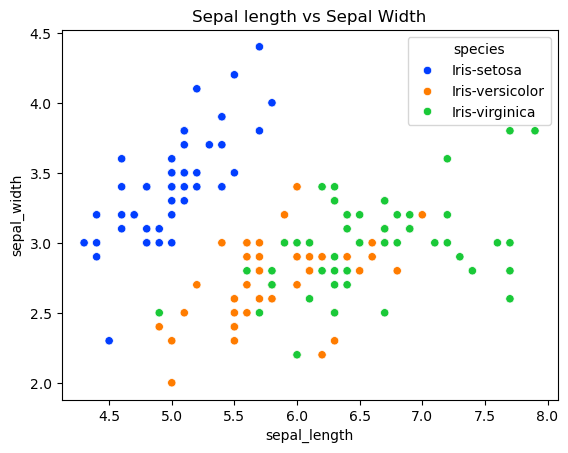

In [36]:
sns.scatterplot(x="sepal_length",y="sepal_width",hue="species",palette="bright",data=df)
plt.title("Sepal length vs Sepal Width")
plt.show()

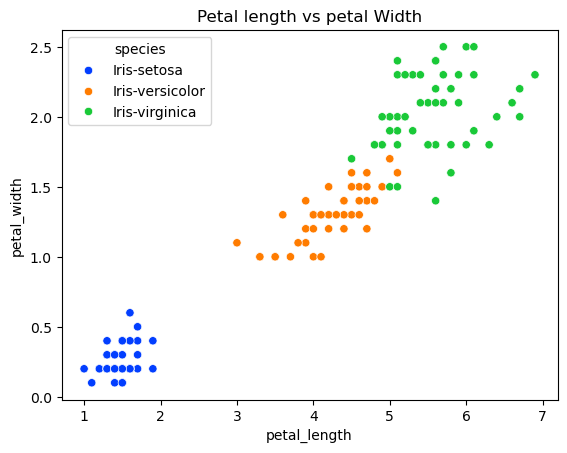

In [38]:
sns.scatterplot(x="petal_length",y="petal_width",hue="species",palette="bright",data=df)
plt.title("Petal length vs petal Width")
plt.show()

In [40]:
#Labelling the species using labelencoder
label_encoder=LabelEncoder()
df['species']=label_encoder.fit_transform(df['species'])

In [42]:
#Data spliting into Dependent variable and Independent Variables
X=df.drop(columns='species')
Y=df['species']

In [44]:
#Train test split
X_train , X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [46]:
#Checking for correlation between independent variables
corr_matrix=df.drop(columns='species',axis=1)

In [48]:
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [50]:
corr_matrix.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


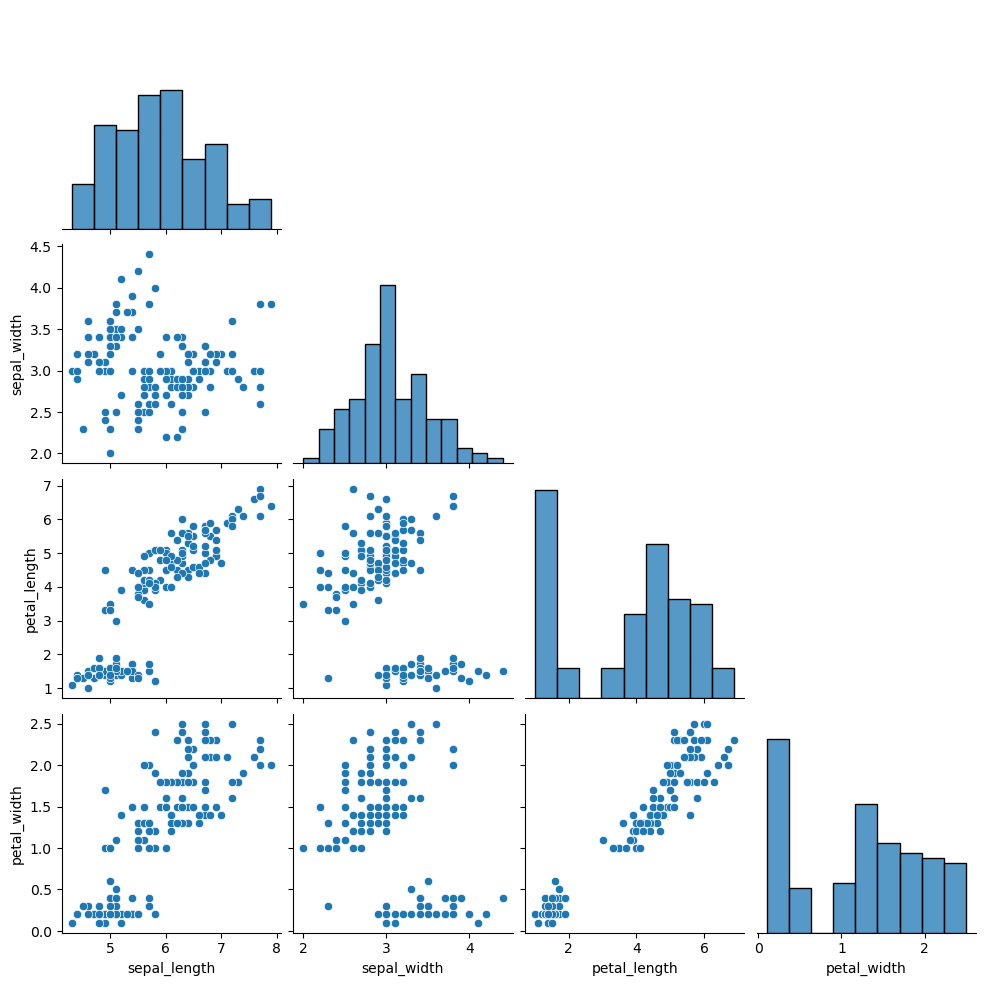

In [72]:
sns.pairplot(corr_matrix,corner=True)

In [74]:
print(X,Y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[147 rows x 4 columns] 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 147, dtype: int32


In [76]:
#Logistic Regression model fitting 
#Multiclass classification
logistic=LogisticRegression(random_state=42)
logistic.fit(X_train,Y_train)

y_pred=logistic.predict(X_test)

In [86]:
#Accuracy
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.9333333333333333


In [84]:
print("Classification Report",classification_report(Y_test,y_pred))


Classification Report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.85      0.92      0.88        12
           2       0.93      0.88      0.90        16

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [90]:
f1_score(Y_test,y_pred,average='macro')

0.927741935483871

In [92]:
confusion_matrix(Y_test,y_pred)

array([[17,  0,  0],
       [ 0, 11,  1],
       [ 0,  2, 14]], dtype=int64)

In [94]:
#The model predicts 47 test data correctly and 3 data-points incorrectly

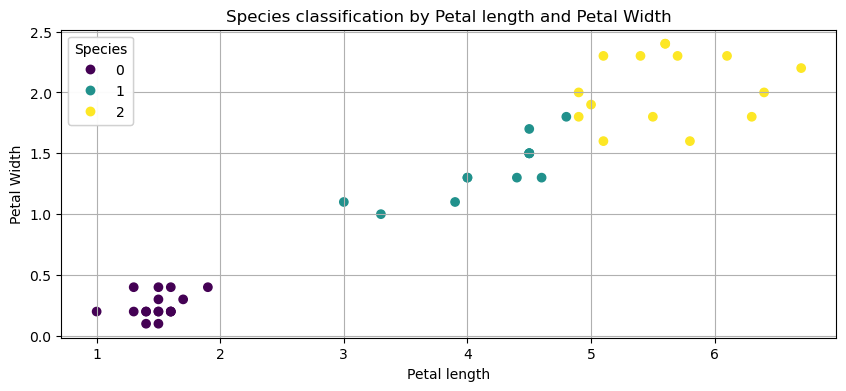

In [102]:
# Using petal length and petal width
plt.figure(figsize=(10,4))
ax=plt.scatter(X_test['petal_length'],X_test['petal_width'],c=y_pred)
plt.xlabel('Petal length')
plt.ylabel('Petal Width')
plt.grid()
plt.title('Species classification by Petal length and Petal Width')
lege=plt.legend(*ax.legend_elements(),loc="upper left",title='Species')
plt.gca().add_artist(lege)